In [1]:
import pandas as pd

wine_pd=pd.read_csv("winequality-red.csv")

In [2]:
wine_pd.drop_duplicates()
wine_pd.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
nrows,ncoulmns=wine_pd.shape
print ({nrows},",",{ncoulmns})

{1599} , {12}


In [4]:
wine_pd=wine_pd.dropna()

nrows,ncoulmns=wine_pd.shape
print ({nrows},",",{ncoulmns})

{1599} , {12}


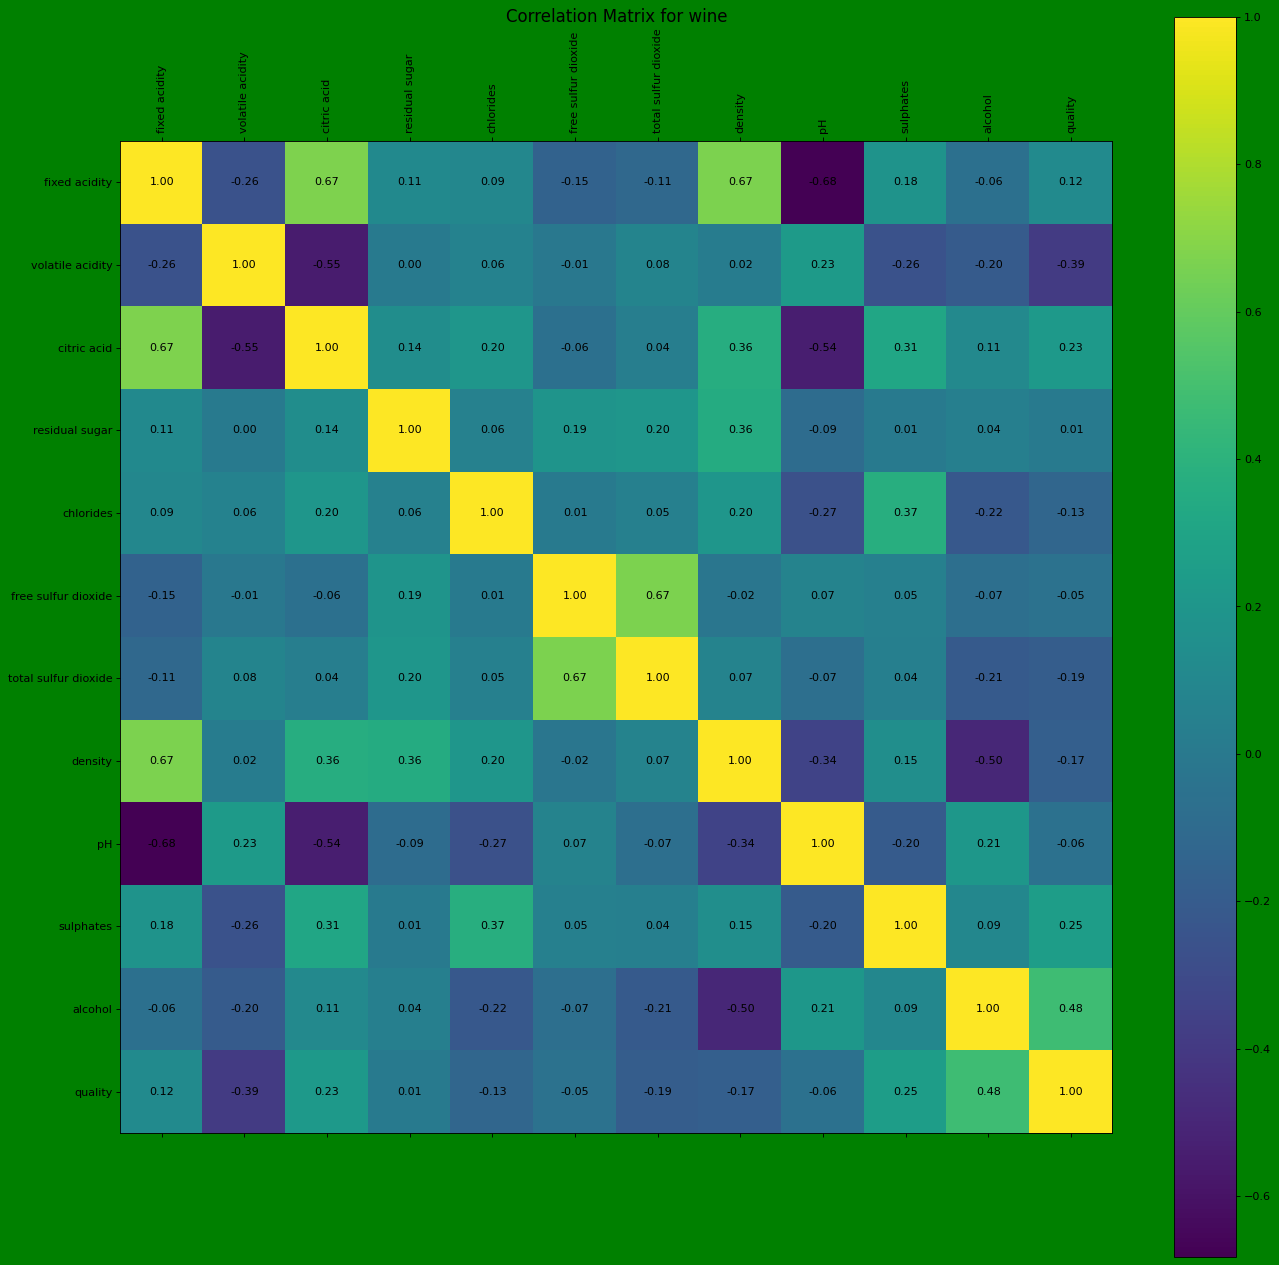

In [12]:
import matplotlib.pyplot as plt 
wine_pd = wine_pd[[col for col in wine_pd if wine_pd[col].nunique() > 1]] # keep columns where there are more than 1 unique values

if wine_pd.shape[1] < 2:
    print(f'No correlation plots shown: The number of non-NaN or constant columns ({wine_pd.shape[1]}) is less than 2') 
corr = wine_pd.corr()
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='g', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
#plt.gca().xaxis.tick_bottom()
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = f"{corr.iloc[i, j]:.2f}"  # Format the correlation coefficient
        plt.text(i, j, text, va='center', ha='center', color='black')

# Add a 
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix for {"wine"}', fontsize=15)
plt.show()

In [6]:
wine_pd.groupby("quality").count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


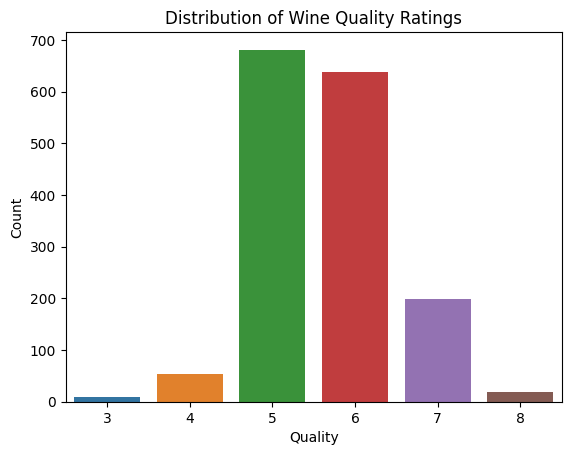

In [7]:
import seaborn as sns

sns.countplot(data=wine_pd,x="quality")
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

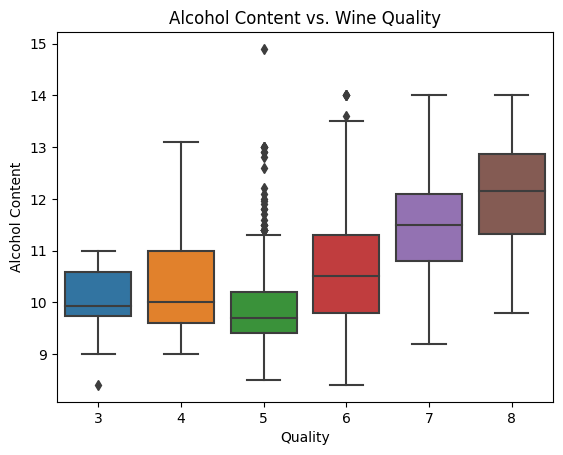

In [8]:
sns.boxplot(data=wine_pd, x="quality",y="alcohol")
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

In [26]:
corr = wine_pd.corr()

# Filter the correlation matrix for correlations >= 0.5
corr_filtered = corr[corr >= 0.5]
corr_filtered = corr_filtered.fillna(0)
corr_filtered = corr_filtered[corr >= 0.5]

# Print the filtered correlation matrix
print(corr_filtered)






                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000               NaN     0.671703   
volatile acidity                NaN               1.0          NaN   
citric acid                0.671703               NaN     1.000000   
residual sugar                  NaN               NaN          NaN   
chlorides                       NaN               NaN          NaN   
free sulfur dioxide             NaN               NaN          NaN   
total sulfur dioxide            NaN               NaN          NaN   
density                    0.668047               NaN          NaN   
pH                              NaN               NaN          NaN   
sulphates                       NaN               NaN          NaN   
alcohol                         NaN               NaN          NaN   
quality                         NaN               NaN          NaN   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    